<h1>**Decision Tree on German Credit Risk data set**</h1>

# Tables of Content:

**1. [Introduction](#intro_dt)** <br>
    - Information about the data set <br>
**2. [Reason for using this model](#reasons_dt)** <br>
    - The purpose of this specific model <br>
**3. [Libraries](#libraries_dt)** <br>
    - Importing Libraries <br>
    - Importing Dataset <br>
**4. [Preprocess](#preprocessing_dt)** <br>
    - 4.1 Separating feature and target variables <br>
    - 4.2 [Feature Selection](#feature_selection_dt)<br>
    - 4.3 [Spliting the X and Y in train and test](#split_dt)<br>
**5. [Models](#modelling_dt)**<br>
    - 5.1 [Decision Tree and Metrics](#metrics_dt)<br>
    - 5.2 Decision Tree with GridSearchCV and Metrics<br>
    - 5.3 [Confusion Matrix and Classification Report](#conmat_dt)<br>
    - 5.4 [Visualize the decision trees](#viz)<br>
**6. [Conclusion and Benefits of the model](#summary_dt)** <br>
    The summary of the model implementation

<a id="intro_dt"></a> <br>
# **1. Introduction:** 
<h2>Context</h2>
The original dataset contains 1000 entries with 9 feature variables. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

<h2>Content</h2>
I have cleaned and preprocessed the data already and also I have created a more relevant feature from two of the most important feature in the data set i.e. Credit amount and Duration. The preprocessed data set is already saved in a CSV file and we are going to use that file for our model training and testing purposes. The selected variables from the orginal data set are:

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - Good or Bad Risk)<br>

<a id="resons_dt"></a> <br>
# **2. Reason for using this model**
<h2>Our goal is to: </h2>

- Implement Decision Tree Classifier with and without GridSearchCV on German Credit Risk data set.
- Assess the impact of different feature selection methods on various metrics.
- Estimate the appropriate amount of trees required for our classification task, which will be achieved by plotting out-of-bag sample error versus the number of trees.
- Assess the different metrics.
- Evaluate False Positive Rate (FPR) on these models using Confusion Matrix.
- Visualize Receiver Operating Characteristics (ROC) curve and Precision-Recall curve to see the trend.

<a id="libraries_dt"></a> <br>
# **3. Libraries**

### Imports

In [1]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

from scipy import stats 
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

from colorsetup import colors, palette

### Read the data

In [2]:
gcr_data = pd.read_csv("gcr_data_imputed2.csv")
#gcr_data = pd.read_csv("gcr_data_imputed.csv")
#gcr_data = pd.read_csv("gcr_processed.csv")

In [3]:
gcr_data.head()

,Age,Sex,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,4.219508,0.693147,2,7.064759,1.945910,0.0000,0.6934,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,1
1,3.135494,0.000000,2,8.691483,3.891820,0.0000,0.6934,0.0,1,0.0,...,0.0,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,0
2,3.912023,0.693147,1,7.648263,2.564949,0.0000,0.6934,0.0,1,0.0,...,0.0,0.0,0,0.0,0.6934,0.0000,0.0000,0.0,0.0,1
3,3.828641,0.693147,2,8.972464,3.761200,0.6934,0.0000,0.0,1,0.0,...,0.0,0.0,0,0.0,0.0000,0.6934,0.0000,0.0,0.0,1
4,3.988984,0.693147,2,8.491055,3.218876,0.6934,0.0000,0.0,1,0.0,...,0.0,0.0,1,0.0,0.0000,0.0000,0.0000,0.0,0.0,0


In [4]:
gcr_data['Credit_amount/duration'] = gcr_data['Credit amount']/gcr_data['Duration']

In [5]:
gcr_data.head()

,Age,Sex,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk,Credit_amount/duration
0,4.219508,0.693147,2,7.064759,1.945910,0.0000,0.6934,0.0,0,0.0,...,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,1,3.630568
1,3.135494,0.000000,2,8.691483,3.891820,0.0000,0.6934,0.0,1,0.0,...,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,0,2.233269
2,3.912023,0.693147,1,7.648263,2.564949,0.0000,0.6934,0.0,1,0.0,...,0.0,0,0.0,0.6934,0.0000,0.0000,0.0,0.0,1,2.981838
3,3.828641,0.693147,2,8.972464,3.761200,0.6934,0.0000,0.0,1,0.0,...,0.0,0,0.0,0.0000,0.6934,0.0000,0.0,0.0,1,2.385532
4,3.988984,0.693147,2,8.491055,3.218876,0.6934,0.0000,0.0,1,0.0,...,0.0,1,0.0,0.0000,0.0000,0.0000,0.0,0.0,0,2.637894


<a id="preprocessing_dt"></a> <br>
# **4. Preprocess**

<h2>4.1 Separating feature and target</h2>

In [6]:
#X = gcr_data.drop(['Risk','Credit_amount/duration'], axis=1)
X = gcr_data.drop(['Risk', 'Credit amount'], axis=1)
#X = gcr_data.drop(['Risk'], axis=1)

y = gcr_data['Risk']

In [7]:
X.shape

(1000, 23)

<a id="feature_selection_dt"></a>
<h2>4.2 Feature Selection</h2>

### 1. Univariate Selection

In [8]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [9]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  #print best features

                         Specs      Score
11     Checking account_little  33.595555
7       Saving accounts_little  10.291479
12   Checking account_moderate   7.248111
19            Purpose_radio/TV   5.707578
6                 Housing_rent   4.901023
10        Saving accounts_rich   4.853800
3                     Duration   4.699713
4                 Housing_free   4.113929
5                  Housing_own   3.604819
9   Saving accounts_quite rich   3.270982


In [10]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

model_eval = DecisionTreeClassifier()

results = list()
for i in range(1,X.shape[1]+1):
        scores = evaluate_model(model_eval, X[featureScores.nlargest(i, 'Score')['Specs']], y)
        results.append(scores)
        print('> %s) %.3f (%.3f)' % (i, mean(scores), std(scores)))

> 1) 0.685 (0.030)
> 2) 0.709 (0.042)
> 3) 0.709 (0.042)
> 4) 0.707 (0.028)
> 5) 0.695 (0.033)
> 6) 0.695 (0.032)
> 7) 0.697 (0.037)
> 8) 0.685 (0.042)
> 9) 0.683 (0.042)
> 10) 0.682 (0.045)
> 11) 0.659 (0.046)
> 12) 0.662 (0.046)
> 13) 0.659 (0.048)
> 14) 0.660 (0.051)
> 15) 0.660 (0.047)
> 16) 0.655 (0.047)
> 17) 0.665 (0.043)
> 18) 0.662 (0.040)
> 19) 0.663 (0.039)
> 20) 0.665 (0.044)
> 21) 0.672 (0.039)
> 22) 0.675 (0.047)
> 23) 0.670 (0.048)


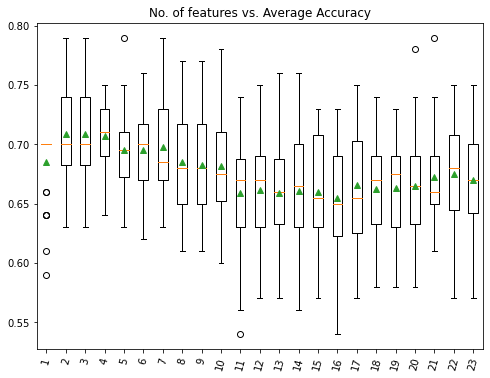

In [11]:
no_of_features = [str(i) for i in range(1,X.shape[1]+1)]
# plot model performance for comparison
plt.figure(figsize=(8,6))
plt.boxplot(results, labels=no_of_features, showmeans=True)
plt.xticks(rotation=75)
plt.title('No. of features vs. Average Accuracy')
plt.show()

In [8]:
#X = gcr_data[featureScores.nlargest(23, 'Score')['Specs'].values]

### 2. Feature Importance

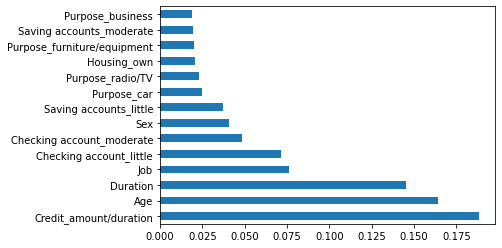

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

model_fi = ExtraTreesClassifier()
model_fi.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_fi.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).nlargest(14).plot(kind='barh')
plt.show()

In [13]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

model_eval = DecisionTreeClassifier()

results = list()
for i in range(1,X.shape[1]+1):
        scores = evaluate_model(model_eval, X[feat_importances.nlargest(i).index], y)
        results.append(scores)
        print('> %s) %.3f (%.3f)' % (i, mean(scores), std(scores)))

> 1) 0.586 (0.040)
> 2) 0.601 (0.033)
> 3) 0.626 (0.047)
> 4) 0.645 (0.042)
> 5) 0.644 (0.042)
> 6) 0.668 (0.039)
> 7) 0.667 (0.041)
> 8) 0.667 (0.037)
> 9) 0.677 (0.032)
> 10) 0.676 (0.036)
> 11) 0.670 (0.043)
> 12) 0.681 (0.043)
> 13) 0.675 (0.039)
> 14) 0.669 (0.047)
> 15) 0.676 (0.047)
> 16) 0.668 (0.053)
> 17) 0.668 (0.055)
> 18) 0.673 (0.053)
> 19) 0.669 (0.045)
> 20) 0.673 (0.044)
> 21) 0.674 (0.046)
> 22) 0.670 (0.044)
> 23) 0.668 (0.048)


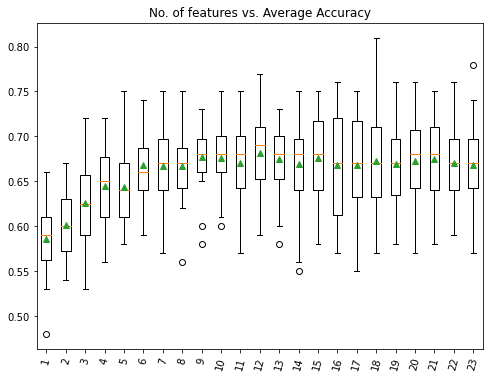

In [14]:
no_of_features = [str(i) for i in range(1,X.shape[1]+1)]
# plot model performance for comparison
plt.figure(figsize=(8,6))
plt.boxplot(results, labels=no_of_features, showmeans=True)
plt.xticks(rotation=75)
plt.title('No. of features vs. Average Accuracy')
plt.show()

### 3. Correlation Matrix with Heatmap

### 4. RFE

In [15]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=14)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=14)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=14)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=14)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=14)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [16]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.657 (0.045)
>per 0.675 (0.041)
>cart 0.684 (0.042)
>rf 0.679 (0.044)
>gbm 0.676 (0.041)


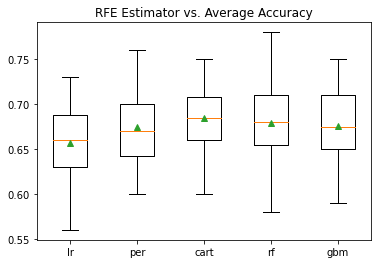

In [17]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.title('RFE Estimator vs. Average Accuracy')
plt.show()

In [18]:
# get a list of models to evaluate
def best_estimator():
    models = dict()
    for i in range(2, X.shape[1]+1):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = best_estimator()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('> %s) %.3f (%.3f)' % (name, mean(scores), std(scores)))

> 2) 0.598 (0.035)
> 3) 0.629 (0.049)
> 4) 0.628 (0.050)
> 5) 0.644 (0.041)
> 6) 0.655 (0.040)
> 7) 0.671 (0.034)
> 8) 0.665 (0.040)
> 9) 0.662 (0.044)
> 10) 0.670 (0.043)
> 11) 0.670 (0.050)
> 12) 0.674 (0.044)
> 13) 0.671 (0.046)
> 14) 0.676 (0.040)
> 15) 0.671 (0.048)
> 16) 0.675 (0.045)
> 17) 0.675 (0.046)
> 18) 0.669 (0.049)
> 19) 0.670 (0.044)
> 20) 0.666 (0.043)
> 21) 0.671 (0.050)
> 22) 0.671 (0.050)
> 23) 0.673 (0.044)


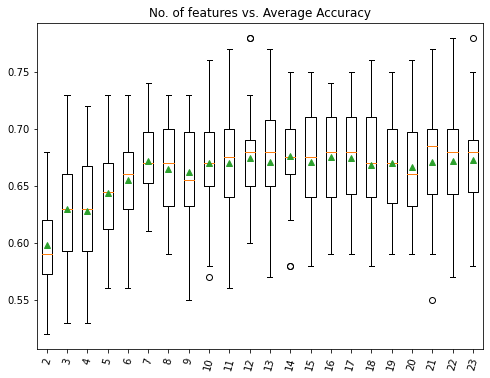

In [19]:
# plot model performance for comparison
plt.figure(figsize=(8,6))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=75)
plt.title('No. of features vs. Average Accuracy')
plt.show()

#### Suppressing any warnings

In [20]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [21]:
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=14)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 9.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 5.000
Column: 10, Selected False, Rank: 6.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected False, Rank: 7.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 4.000
Column: 16, Selected False, Rank: 10.000
Column: 17, Selected False, Rank: 3.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 2.000
Column: 21, Selected False, Rank: 8.000
Column: 22, Selected True, Rank: 1.000


<a id="split_dt"></a>
<h2>4.3 StratifiedShuffleSplit</h2>

In [22]:
#X = gcr_data[feat_importances.nlargest(15).index]
X = gcr_data[X.columns[rfe.support_]]
#X = gcr_data[featureScores.nlargest(2, 'Score')['Specs']]

#X.head()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(X, gcr_data.Risk))

# Create the dataframes
X_train = X.loc[train_idx, X.columns]
y_train = gcr_data.loc[train_idx, 'Risk']

X_test  = X.loc[test_idx, X.columns]
y_test  = gcr_data.loc[test_idx, 'Risk']

<a id="modelling_dt"></a> <br>
# **5. Models**

#### Suppressing any warnings

In [24]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

<a id="metrics_dt"></a>
<h2>5.1 Decision Tree and Metrics</h2>

In [25]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

dt.tree_.node_count, dt.tree_.max_depth

(345, 20)

In [26]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred),
                      'auc': roc_auc_score(label_binarize(y_true, classes=[0,1]),
                      label_binarize(y_pred, classes=[0,1]), 
                      average='weighted')},
                      name=label)

# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.686667
precision,1.0,0.781553
recall,1.0,0.766667
f1,1.0,0.774038
auc,1.0,0.633333


<h2>5.2. Decision Tree with GridSearchCV and Metrics</h2>

In [27]:
from sklearn.model_selection import GridSearchCV

# hyperparameters
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2), 
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(53, 5)

In [28]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

train_test_gr_error

,train,test
accuracy,0.785714,0.736667
precision,0.792096,0.750958
recall,0.940816,0.933333
f1,0.860075,0.832272
auc,0.682313,0.605556


<a id="conmat_dt"></a>
<h2>5.3 Confusion Matrix and Classification Report</h2>

[Text(0.5, 1.0, 'Decision Tree')]

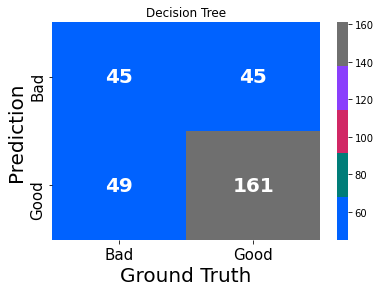

In [29]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(6,4))
ax = sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 20, "weight": "bold"})  
labels = ['Good', 'Bad']
ax.set_xticklabels(labels[::-1], fontsize=15);
ax.set_yticklabels(labels[::-1], fontsize=15);
ax.set_ylabel('Prediction', fontsize=20);
ax.set_xlabel('Ground Truth', fontsize=20)
ax.set(title='Decision Tree')

[Text(0.5, 1.0, 'Decision Tree with GridSearchCV')]

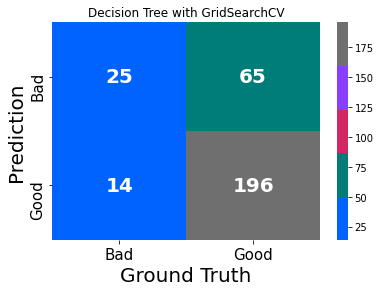

In [30]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(6,4))
ax = sns.heatmap(confusion_matrix(y_test, y_test_pred_gr), annot=True, fmt='d', cmap=colors, annot_kws={"size": 20, "weight": "bold"})  
labels = ['Good', 'Bad']
ax.set_xticklabels(labels[::-1], fontsize=15);
ax.set_yticklabels(labels[::-1], fontsize=15);
ax.set_ylabel('Prediction', fontsize=20);
ax.set_xlabel('Ground Truth', fontsize=20)
ax.set(title='Decision Tree with GridSearchCV')

In [31]:
print('#'*60)
print('Decision Tree')
y_pred_dt = dt.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred_dt))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_dt), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_dt), 3))

print('\n')
print('#'*60)

y_pred_GR = GR.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print('Decision Tree with GridSearchCV')
print(classification_report(y_test, y_pred_GR))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_GR), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_GR), 3))

############################################################
Decision Tree
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        90
           1       0.78      0.77      0.77       210

    accuracy                           0.69       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.69      0.69      0.69       300

Accuracy score:  0.687
F1 Score:  0.774


############################################################
Decision Tree with GridSearchCV
              precision    recall  f1-score   support

           0       0.64      0.28      0.39        90
           1       0.75      0.93      0.83       210

    accuracy                           0.74       300
   macro avg       0.70      0.61      0.61       300
weighted avg       0.72      0.74      0.70       300

Accuracy score:  0.737
F1 Score:  0.832


<a id="viz"></a>
<h2>5.4 Visualize the decision trees</h2>

<a id="summary_dt"></a> <br>
# **6. Conclusion and Benefits of the model**
- Decision Tree without GridSearchCV gives an accuracy of 69% and with GridSearchCV 74% when no. of features selected were 15.
- However, the metrics obtained by Decision Tree is quite fickle, they change at every runtime.
- GridSearchCV reduces the node count and depth of trees to a significant amount which make it compute faster.
- The FPR obtained by GridSearchCV is 36% which is substantially better than vanilla Decision Tree.
- Polynomial Features i.e. (Credit_amount_duration) helped us to improve the metrics on this dataset for all implementations.

########################################################################################################################################